In [34]:
%pip install -q numpy
%pip install -q matplotlib
%pip install -q Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import io
import os

In [2]:
WIDTH, HEIGHT = 96, 96

In [3]:
current_path = os.getcwd()
images_path = current_path+'/static_images/sample_images'
print(images_path)

/home/seba/Code/SistEmb/proyecto/fill_water_system/static_images/sample_images


In [4]:
images = []
for file in os.listdir(images_path):
    if file.startswith("image") or file.startswith("user"):
        images.append(file)

print("All images ")
for indx, image in enumerate(images):
    print(indx, image)

All images 
0 image0
1 image1
2 image2
3 image3
4 image4
5 image5
6 image6
7 image7
8 image8
9 image9
10 image10
11 image11
12 image12
13 image13
14 image14
15 image15
16 image16
17 image17
18 image18
19 image19
20 image20
21 image21
22 image22
23 image23
24 image24
25 image25
26 image26
27 image27
28 image28
29 image29
30 image30
31 image31


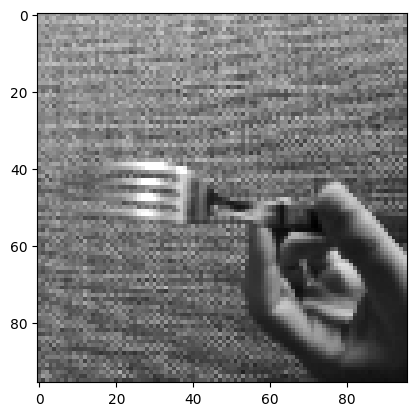

int8


In [22]:
while True:
    try:
        image_indx = int(input("Enter the index of the image: "))
        if image_indx < 0 or image_indx >= len(images):
            print("Please enter a valid index")
            continue
        break
    except:
        print("Please enter a valid index")

file_path = images_path+'/'+images[image_indx]

with open(file_path, 'rb') as file:
    file_bytes = file.read()
    image_data_one_dimension = np.frombuffer(file_bytes, dtype=np.int8)
    image_data = image_data_one_dimension.reshape((HEIGHT, WIDTH))
    plt.imshow(image_data, cmap='gray')  # Use grayscale color map
    # plt.axis('off')  # Hide axis labels and ticks
    plt.show()
    print(image_data.dtype)
        

In [6]:
def get_image(values):
    image = np.zeros((WIDTH,HEIGHT))
    d=0
    for y in range(0,HEIGHT-1):
        for x in range(0,WIDTH-1):
            image[y,x] = values[y*WIDTH+x]
    return image

In [10]:
dec_img = np.array([
31, 28, 33, 28, 34, 29, 25, 27, 21, 9, 14, 5, 4, -1, -8, -6, -7, -14, -16, -15, -20, -24, -34, -40, -39, -41, -39, -41, -40, -23, -37, -39, -27, -29, -27, -24, -10, -8, 3, 2, -6, -4, -6, -8, 1, -9, -5, -5, 0, -2, -4, -6, 2, -3, -5, 0, -4, -2, -7, -7, -2, 2, 11, -2, 11, 3, 1, -3, -4, 0, 1, 7, 1, -1, -1, 5, -1, 4, 4, 4, 1, 2, 5, 6, 4, 9, 1, 3, 2, 5, 2, 1, -3, -2, 4, 4, 12, 17, 24, 18, 13, 1, -9, -15, -10, -13, -17, -19, -12, -14, -12, -3, -4, -4, -3, 2, 3, -3, 4, -6, 11, 2, -2, 3, 9, -1, 3, 5, -10, 11, 11, 2, -6, 10, 5, 1, 4, -3, 0, -1, -1, -5, 3, 0, 0, -1, 3, 8, -1, -4, 2, 6, -7, 4, -1, -1, 0, -1, -1, -1, 0, -1, 6, 4, 3, 5, 4, 2, 3, 1, 4, 6, 4, 6, 2, 4, 4, -2, 1, 0, 5, 2, 4, -2, -1, 2, -2, -4, 5, -3, -8, 0, 12, 10, 22, 9, 13, 3, 2, 3, 1, 5, 12, 3, 7, 2, 6, 7, 7, 7, 6, 3, 3, -16, 4, -2, 3, -6, -1, -4, -1, 1, 4, 4, 6, 2, 11, 9, 1, 7, 4, 6, 11, 6, 5, 8, 3, 7, 12, 4, 7, 6, 10, 7, -1, 12, 11, 9, 4, 2, 3, 6, 7, 10, 6, 1, 7, 7, 3, 4, 7, 11, 3, 3, 1, 1, 3, 4, 2, 8, 2, 1, 4, -2, 0, 7, 0, 2, -2, -3, -1, -2, -4, -1, -6, -2, -9, -7, 8, 9, 8, 8, 8, 9, 0, 11, 15, 7, 4, 11, 3, 8, 5, 11, 7, 8, -4, -2, -4, -3, 2, -3, -1, 5, 5, 8, 6, 1, 6, 7, 8, 14, 11, 7, 12, 3, 8, 7, 11, 4, 5, 3, 6, 9, 10, 9, 3, 6, 4, 11, 2, 11, 2, 11, 7, 8, 6, 2, 3, -1, 4, 6, 7, 7, 11, 8, 4, 9, 3, 6, -1, 1, -2, -1, 4, -1, 4, -1, 8, -3, -4, -2, 4, 3, -4, -6, -6, -2, -6, -3, -3, -12, -4, -5, 10, 10, 6, 8, 8, 12, 10, 7, 1, 5, 8, 11, 5, 15, 9, 2, 13, 6, 11, 3, 15, 12, 12, 4, 4, 7, 4, 10, 12, 11, 16, 9, 7, 6, 9, 12, 11, 10, 13, 7, 7, 14, 6, 5, 13, 7, 9, 2, 9, 6, 7, -5, 7, 3, 5, 4, 13, 10, 8, 5, 11, 4, 0, 1, 7, 2, 5, -2, 5, 2, 3, 2, 2, 5, 0, 1, 0, -3, 1, -1, 3, -4, -1, -1, -9, -7, -6, -4, -7, -7, -2, -7, -4, -6, -6, -9, 10, 7, 7, 5, 10, 11, 10, 7, 2, 9, 10, 14, 9, 6, 6, 5, 8, 10, 9, 12, 7, 4, 2, 20, 11, 13, 10, 6, 9, 9, 13, 14, 9, 8, 6, 5, 7, 3, 7, -2, 2, 0, 6, 14, 6, 5, 8, 12, 10, 4, 4, 10, 3, 5, 5, 5, 5, 1, 5, 5, 3, 4, 0, 1, 2, 0, 9, 2, 4, 1, -1, 0, 1, -3, 2, -1, -5, -3, -2, -1, 2, 0, -5, -3, -2, -6, -9, -7, -7, -7, -9, -5, -9, -17, -17, -11, 5, 7, 11, 10, 5, 8, 11, 6, 8, 10, 7, 7, 11, 8, 12, 10, 4, 12, 12, 7, 5, 11, 14, 11, 6, -1, 6, 8, 9, 18, 7, 5, 7, 6, 1, 7, 7, 5, 7, 3, 6, 5, 9, 6, 13, 11, 2, 5, 10, 2, 9, 3, 2, 5, 7, 1, 1, 6, 9, 10, 9, 3, 2, 0, 4, 8, 2, -1, 4, 2, 8, -3, -2, 1, -1, 0, -4, -4, -4, -5, -6, -4, -3, -8, -1, -7, -6, -7, -10, -7, -12, -9, -5, -12, -11, -9, 12, 6, 11, 10, 13, 8, 11, 9, 13, 10, 4, 5, 11, 11, 10, 12, 7, 5, 4, 7, 0, 7, 8, 6, 12, 10, 12, 12, 11, 11, 8, 8, 2, 6, 10, 0, 4, 3, 3, 5, 3, 2, 1, 10, 9, -4, 9, 10, 6, 4, 3, 1, 12, 0, 1, 8, 2, 6, 0, 4, 2, 3, 2, 0, 1, -2, -2, 2, -2, 7, 3, -4, -3, -5, 2, -13, -2, -5, -3, -8, -6, -5, -9, -8, -4, -6, -8, -12, -13, -4, -12, -11, -11, -12, -16, -9, 8, 7, 13, 5, 14, 9, 10, 7, 12, 6, 12, 11, 12, 5, 11, 11, 10, 8, 11, 6, 4, 8, 10, 14, 9, 10, 15, 7, 8, 11, 11, 5, 13, 7, 5, 3, 6, 7, 8, 0, 4, 12, 8, 9, 4, -1, 3, 4, 2, 5, 4, 5, 8, 0, 2, 0, 1, -3, 7, 2, -2, 0, 0, 4, -6, -4, -3, -3, -6, -4, -8, -6, -10, -6, -7, -6, -6, -12, -7, -13, -7, -8, -10, -3, -10, -10, -9, -10, -11, -11, -11, -17, -11, -13, -16, -8, 13, 8, 8, 6, 13, 12, 16, 7, 15, 8, 6, 11, 5, 16, 10, 11, 10, 9, 11, 12, 8, 15, 11, 16, 7, 12, 7, 4, 4, 8, 16, 8, 1, 10, 10, 4, 9, 1, 4, 8, 7, 3, 3, -4, -5, -1, 1, -2, -1, 5, 5, 0, -5, 3, -2, 3, -4, 3, 2, 2, -3, -3, -1, -3, -5, -2, -6, -4, -3, -1, -4, -2, -9, -2, -7, -10, -8, -15, -10, -11, -16, -8, -13, -10, -13, -8, -14, -11, -13, -16, -14, -14, -14, -16, -20, -18, 4, 11, 12, 10, 17, 8, 10, 12, 8, 13, 9, 10, 19, 5, 13, 9, 14, 13, 10, 10, 6, 8, 8, 7, 11, 10, 5, 9, 5, 7, 11, 8, 7, 3, 9, 4, 11, -1, -1, 3, -1, 10, 6, 4, -2, 3, -5, 1, -2, 2, 1, -1, -1, -1, -1, 0, -2, -1, -2, -3, 3, -4, -2, -2, -3, -13, 0, -5, -8, -10, -6, -3, -8, -6, -9, -18, -9, -12, -12, -9, -9, -12, -13, -10, -7, -13, 2, -18, -16, -10, -14, -14, -18, -11, -13, -12, 6, 13, 8, 3, 8, 7, 9, 9, 4, 16, 14, 5, 10, 9, 15, 8, 8, 15, 10, 5, 7, 2, 8, 7, 9, 9, -5, 12, 6, 4, 9, 8, 10, 7, 1, 4, 2, 0, 5, 5, -4, 0, 7, -1, 8, -1, 3, -1, 1, 5, 5, 2, -3, 8, 7, -1, 1, -1, -2, -9, -5, -6, -7, -4, -6, -3, 1, -8, -6, -10, -4, -6, -11, -2, -7, 2, -13, -8, -14, -10, -13, -13, -9, -7, -9, -15, -12, -9, -15, -8, -11, -16, -12, -15, -20, -15, 11, 16, 11, 6, 13, 4, 14, 7, 3, 10, 11, 8, 8, 12, 18, 12, 10, 11, 8, 15, 13, 11, 5, 2, 5, 3, 8, 5, 5, 14, -1, 11, 3, 4, 2, 2, 4, 3, -5, 3, 2, 4, 4, 6, 9, 0, 1, -3, -1, -4, -5, -1, 0, 2, 3, 0, 0, 5, 0, -1, 3, -12, -7, -1, -4, 1, -3, -5, -7, -7, -9, -3, -10, -6, -5, -8, -12, -11, -8, -9, -4, -6, -9, -12, -4, -12, -8, -8, -7, -10, -16, -14, -11, -13, -11, -17, 4, 8, 5, 10, 4, 3, 13, 8, 12, 8, 6, 5, 10, 4, 11, 9, 9, 11, 7, 3, 8, 11, 8, 8, 6, 9, 9, 10, 5, 9, 3, 3, 4, 4, 0, -3, -5, 4, -7, 9, -1, -3, 2, 6, 0, 0, 1, 1, 5, -3, 0, -8, 8, 0, -6, 4, -3, 3, 2, 5, -3, -9, -5, -8, 2, -2, -8, 0, -6, -8, -1, -8, -6, -6, -9, -1, -4, -4, -4, -12, -4, 0, -2, -8, 0, -2, 2, -5, -3, -4, -3, -11, -15, -7, -10, -12, 2, 7, 5, 3, 1, 16, 11, 3, 9, 7, 7, 15, 7, 8, 7, 5, 6, 12, 9, 7, 10, 10, 11, 14, 13, 12, 6, 15, 3, 7, -2, 7, 7, 3, 3, 5, 0, 8, 3, 4, 6, 6, 5, 1, 2, -2, 3, -4, -2, 8, 2, 2, 8, 2, -1, 9, 3, -2, 3, 7, -1, 9, 1, 5, -1, -5, -2, 4, -3, 3, 4, 3, -1, -5, 4, 5, -1, -7, 3, 3, -4, -6, 3, -5, -7, 0, -6, -4, -8, -4, -7, -11, -1, -12, -3, -9, 2, 8, 7, 8, 5, 4, 5, 7, 20, 7, 11, 10, 10, 10, 15, 17, 7, 13, 14, 18, 5, 10, 10, 13, 17, 10, 10, 11, 15, 9, 7, 9, 5, 5, 10, 1, 5, 6, 5, 9, 4, 7, 4, 3, 4, 6, 0, 2, 5, 5, 6, 7, 2, 7, -3, -3, 1, 7, 0, 4, -1, 1, 4, 4, 6, -1, 4, 6, 3, -1, 3, -1, 6, 5, 1, 4, 2, 2, -2, -1, 2, 2, -3, -2, -4, 2, -7, -2, -7, -7, -10, -13, -5, -9, -6, -2, 8, 7, 3, 11, 12, 9, 7, 13, 8, 11, 8, 3, 14, 12, 17, 13, 12, 10, 10, 11, 12, 9, 12, 18, 7, 15, 15, 16, 15, 12, 10, 2, 5, 9, 4, 2, 9, 16, 9, 11, 11, 10, 8, 14, 8, 5, 10, 12, 10, 4, 7, 8, 7, 9, 8, 7, 1, 3, 8, 3, 9, 8, 3, 13, 18, 4, 5, 8, 11, 6, 8, 11, 7, 8, 1, 4, 7, 5, 3, 0, 5, 4, 6, 3, 6, 9, 6, 4, 0, -4, -3, -5, -6, -4, -3, -5, 8, 11, 8, 10, 12, 21, 7, 6, 15, 13, 10, 12, 7, 10, 15, 12, 16, 19, 15, 11, 8, 12, 22, 14, 19, 18, 15, 10, 10, 20, 11, 14, 16, 12, 14, 12, 4, 9, 11, 10, 13, 13, 12, 12, 10, 10, 11, 10, 10, 8, 11, 7, 4, 3, 8, 8, 7, 2, 11, 20, 9, 4, 3, 8, 9, 12, 4, 8, 8, 7, 7, 5, 6, 9, 8, 9, 4, 12, 4, 4, 4, 13, 5, 5, 7, 5, -4, -1, 2, -3, -9, -1, -5, -5, -6, -6, 14, 6, 9, 13, 12, 14, 9, 8, 11, 18, 8, 11, 20, 13, 18, 8, 16, 12, 10, 6, 17, 11, 12, 18, 15, 19, 17, 16, 19, 14, 19, 12, 15, 10, 10, 15, 14, 6, 13, 11, 14, 8, 3, 7, 11, 9, 10, 14, 13, 9, 10, 9, 10, 11, 8, 17, 8, 7, 10, 12, 8, 8, 5, 8, 11, 7, 10, 8, 15, 9, 3, 10, 7, 7, 7, 6, 17, 6, 4, 9, 10, 6, 6, 7, 4, 5, 4, -1, -3, -2, -9, -9, -6, -3, -6, -9, 14, 13, 19, 11, 19, 11, 9, 19, 13, 15, 8, 17, 13, 16, 20, 16, 16, 17, 14, 18, 25, 24, 22, 24, 14, 21, 19, 16, 13, 13, 20, 17, 17, 17, 16, 18, 16, 20, 13, 16, 19, 11, 8, 14, 13, 15, 16, 15, 11, 13, 17, 12, 10, 10, 12, 11, 14, 10, 14, 7, 9, 8, 10, 12, 9, 14, 11, 9, 13, 10, 17, 9, 9, 9, 10, 10, 8, 3, 8, 17, 5, 8, 6, 4, 6, 1, -4, -4, -2, -9, -7, -3, -8, -8, -12, -9, 27, 11, 14, 14, 14, 12, 15, 16, 15, 16, 13, 7, 22, 12, 12, 15, 22, 24, 21, 17, 18, 18, 18, 25, 22, 28, 16, 19, 20, 18, 19, 20, 16, 17, 17, 22, 13, 16, 13, 23, 19, 17, 12, 14, 15, 15, 9, 12, 16, 15, 14, 8, 14, 14, 9, 7, 11, 16, 1, 9, 16, 9, 9, 9, 9, 10, 8, 12, 14, 10, 12, 15, 11, 11, 14, 10, 14, 13, 10, 10, 13, 6, 3, 3, -1, 0, -9, -6, -10, -6, -11, -12, -8, -12, -10, -8, 13, 15, 18, 14, 15, 13, 17, 18, 16, 18, 18, 18, 16, 20, 19, 19, 15, 23, 19, 20, 18, 24, 26, 24, 24, 26, 22, 20, 24, 20, 17, 19, 17, 20, 21, 19, 17, 22, 24, 20, 16, 19, 20, 18, 13, 17, 19, 17, 20, 18, 13, 17, 13, 15, 18, 15, 13, 14, 13, 13, 16, 12, 16, 13, 9, 9, 13, 17, 14, 12, 17, 15, 9, 12, 15, 15, 13, 12, 13, 15, 9, 6, 3, 1, -1, -8, -10, -12, -15, -16, -18, -16, -19, -12, -10, -10, 16, 16, 8, 9, 16, 19, 23, 21, 17, 21, 16, 16, 17, 22, 18, 27, 24, 21, 20, 28, 19, 20, 27, 21, 27, 21, 28, 25, 29, 19, 25, 22, 25, 25, 18, 17, 19, 21, 20, 20, 16, 15, 18, 12, 17, 20, 24, 20, 23, 22, 22, 16, 17, 15, 15, 18, 13, 13, 16, 13, 12, 11, 16, 14, 13, 18, 12, 11, 11, 18, 21, 17, 21, 14, 22, 14, 11, 15, 15, 16, 7, 6, 5, -3, -15, -21, -24, -20, -23, -25, -16, -21, -17, -14, -17, -16, 15, 14, 20, 16, 19, 13, 19, 18, 23, 21, 22, 25, 24, 20, 27, 24, 25, 29, 28, 27, 23, 28, 27, 29, 25, 22, 25, 21, 25, 24, 24, 28, 26, 23, 29, 24, 24, 26, 20, 22, 23, 23, 17, 21, 20, 29, 22, 17, 20, 22, 19, 17, 18, 19, 19, 15, 16, 13, 15, 20, 21, 24, 19, 14, 16, 15, 15, 15, 16, 11, 18, 19, 19, 14, 15, 19, 20, 18, 14, 15, 8, 2, -8, -15, -19, -29, -35, -33, -32, -31, -31, -30, -32, -21, -23, -16, 19, 19, 28, 20, 21, 14, 26, 20, 24, 16, 29, 23, 26, 23, 26, 26, 25, 23, 22, 24, 28, 26, 28, 23, 29, 31, 29, 24, 25, 23, 32, 31, 29, 29, 31, 26, 26, 20, 19, 26, 24, 24, 23, 22, 23, 26, 26, 23, 25, 26, 22, 18, 21, 21, 18, 18, 11, 14, 20, 20, 20, 22, 17, 24, 18, 18, 18, 19, 17, 22, 20, 24, 22, 24, 17, 19, 21, 16, 14, 7, 5, -5, -9, -20, -29, -35, -33, -34, -37, -37, -40, -39, -35, -38, -24, -29, 23, 17, 21, 14, 19, 19, 29, 24, 25, 25, 23, 20, 28, 31, 27, 27, 29, 30, 31, 27, 28, 28, 38, 30, 21, 30, 30, 30, 30, 35, 28, 29, 27, 30, 27, 28, 24, 30, 28, 29, 22, 28, 30, 22, 24, 33, 31, 29, 29, 27, 23, 25, 26, 22, 21, 19, 19, 20, 21, 27, 23, 24, 19, 19, 16, 19, 20, 21, 24, 25, 18, 22, 26, 21, 17, 24, 21, 13, 8, 1, -3, -12, -21, -28, -27, -33, -41, -41, -36, -43, -41, -36, -38, -36, -32, -37, 23, 24, 20, 22, 21, 26, 24, 25, 24, 26, 30, 28, 27, 33, 30, 30, 26, 26, 29, 28, 28, 32, 32, 33, 30, 31, 30, 31, 30, 30, 28, 30, 32, 31, 35, 30, 28, 36, 31, 30, 28, 27, 25, 37, 30, 28, 29, 29, 27, 33, 27, 29, 32, 28, 23, 23, 24, 18, 22, 19, 23, 24, 27, 20, 20, 19, 20, 21, 25, 22, 22, 25, 21, 22, 20, 17, 18, 17, 14, -10, -12, -21, -33, -33, -35, -45, -41, -47, -46, -45, -48, -42, -46, -40, -40, -47, 18, 37, 25, 29, 28, 25, 26, 37, 27, 32, 28, 28, 29, 33, 32, 31, 29, 29, 30, 35, 37, 36, 29, 25, 31, 35, 32, 38, 32, 32, 41, 31, 31, 30, 36, 34, 34, 33, 31, 30, 29, 30, 29, 32, 32, 34, 34, 29, 30, 29, 30, 29, 30, 30, 35, 29, 22, 28, 26, 26, 27, 24, 25, 21, 23, 22, 18, 18, 15, 20, 22, 24, 24, 20, 18, 17, 14, 9, -15, -15, -29, -28, -37, -40, -40, -43, -43, -50, -51, -49, -48, -48, -48, -41, -44, -43, 24, 26, 29, 26, 28, 29, 31, 33, 33, 26, 32, 30, 31, 23, 30, 27, 32, 34, 30, 31, 33, 33, 30, 32, 36, 29, 33, 36, 36, 35, 40, 29, 36, 40, 38, 30, 36, 34, 33, 40, 33, 32, 33, 35, 34, 31, 33, 33, 33, 33, 32, 31, 37, 30, 31, 29, 24, 23, 27, 26, 25, 24, 22, 22, 26, 25, 22, 20, 19, 12, 11, 13, 19, 18, 15, 6, -2, -8, -20, -31, -34, -40, -40, -42, -43, -46, -46, -49, -47, -49, -49, -48, -45, -44, -47, -49, 22, 28, 29, 24, 32, 28, 25, 27, 32, 34, 35, 31, 29, 29, 31, 28, 32, 31, 34, 41, 28, 28, 31, 35, 30, 41, 37, 38, 38, 37, 39, 38, 36, 41, 42, 38, 37, 37, 35, 35, 36, 34, 34, 37, 37, 37, 39, 35, 34, 35, 32, 31, 34, 34, 34, 28, 26, 24, 27, 29, 21, 25, 26, 22, 21, 23, 20, 18, 1, 10, 6, 7, 13, 7, 1, -4, -9, -24, -21, -39, -38, -43, -41, -49, -48, -44, -48, -53, -51, -50, -48, -49, -51, -50, -45, -50, 31, 30, 28, 29, 27, 27, 32, 37, 31, 34, 36, 31, 30, 30, 30, 38, 38, 34, 38, 39, 27, 32, 24, 33, 34, 34, 39, 36, 40, 38, 34, 41, 39, 39, 37, 39, 40, 40, 39, 40, 38, 39, 40, 36, 38, 32, 36, 35, 33, 36, 27, 34, 38, 37, 30, 27, 33, 31, 22, 25, 24, 26, 24, 24, 20, 17, 19, 20, 5, 15, 7, 6, 3, -2, -6, -20, -25, -29, -30, -47, -44, -43, -45, -50, -44, -50, -52, -54, -54, -45, -53, -47, -49, -52, -49, -51, 28, 31, 32, 30, 31, 34, 30, 33, 31, 31, 33, 30, 32, 31, 34, 39, 36, 34, 34, 36, 36, 33, 32, 35, 37, 37, 40, 40, 39, 34, 36, 36, 45, 37, 39, 38, 37, 38, 39, 40, 39, 40, 37, 32, 36, 37, 40, 34, 33, 34, 34, 34, 35, 36, 32, 34, 32, 26, 29, 23, 21, 22, 22, 19, 18, 17, 13, 13, 13, 5, 5, 1, -5, -10, -21, -29, -30, -37, -39, -44, -42, -46, -48, -49, -49, -47, -48, -50, -48, -48, -51, -51, -46, -47, -51, -52, 35, 29, 29, 41, 33, 38, 33, 36, 31, 31, 36, 36, 32, 35, 36, 40, 37, 41, 40, 32, 40, 35, 33, 36, 39, 33, 36, 36, 37, 35, 37, 39, 41, 34, 37, 41, 42, 40, 40, 41, 39, 37, 38, 37, 36, 38, 37, 37, 32, 30, 33, 34, 32, 34, 34, 30, 29, 29, 28, 28, 23, 22, 22, 18, 17, 15, 13, 9, 7, 9, -1, -3, -13, -18, -31, -38, -40, -39, -43, -44, -46, -48, -50, -42, -50, -53, -48, -46, -55, -50, -50, -51, -49, -51, -50, -53, 31, 33, 32, 33, 32, 34, 30, 34, 31, 33, 33, 36, 34, 34, 37, 37, 32, 37, 33, 36, 37, 32, 35, 39, 35, 43, 39, 34, 37, 36, 35, 35, 40, 40, 37, 39, 39, 40, 34, 39, 40, 37, 39, 37, 36, 37, 35, 32, 31, 32, 29, 34, 33, 32, 32, 29, 30, 30, 25, 28, 27, 26, 21, 24, 15, 14, 10, 9, 5, -3, -9, -18, -25, -33, -35, -36, -44, -43, -51, -48, -45, -47, -43, -44, -46, -48, -55, -56, -53, -51, -52, -47, -52, -48, -51, -54, 29, 38, 33, 34, 33, 35, 29, 31, 35, 37, 36, 36, 33, 33, 36, 37, 34, 32, 40, 36, 35, 33, 33, 36, 33, 36, 36, 38, 36, 38, 39, 37, 42, 40, 36, 34, 12, -21, -27, -29, -8, 14, 26, 35, 32, -11, -37, -63, -73, -72, -73, -68, -31, 5, 22, 31, 26, 27, 28, 28, 26, 22, 19, 17, 13, 9, 8, 1, -5, -22, -26, -21, -26, -41, -45, -53, -43, -37, -54, -46, -45, -52, -54, -46, -48, -54, -51, -50, -50, -49, -53, -49, -50, -55, -52, -54, 28, 29, 26, 30, 33, 30, 34, 33, 31, 32, 36, 38, 35, 33, 40, 36, 35, 36, 40, 41, 37, 40, 34, 36, 33, 36, 31, 34, 38, 43, 39, 36, 40, 11, -47, -78, -82, -79, -88, -95, -100, -101, -96, -69, -44, -48, -67, -81, -96, -97, -96, -97, -95, -90, -69, -52, -35, -16, 7, 25, 18, 22, 20, 11, 12, 10, -4, -6, -23, -30, -37, -41, -38, -46, -48, -46, -48, -43, -48, -49, -44, -58, -47, -48, -49, -45, -50, -54, -50, -51, -53, -53, -52, -50, -56, -57, 26, 27, 30, 29, 30, 28, 31, 28, 31, 30, 37, 36, 35, 37, 38, 39, 32, 37, 44, 35, 34, 39, 35, 35, 40, 36, 34, 40, 39, 39, 42, 38, -29, -76, -86, -72, -72, -63, -60, -67, -85, -95, -102, -101, -94, -71, -58, -59, -62, -66, -73, -89, -73, -18, -47, -32, -49, -58, -56, -53, -50, -33, -17, -4, 3, 1, -9, -19, -37, -39, -38, -36, -42, -47, -48, -50, -53, -51, -51, -47, -49, -50, -51, -53, -52, -47, -52, -53, -50, -49, -52, -51, -52, -53, -54, -57, 32, 27, 29, 31, 23, 32, 29, 29, 33, 30, 26, 34, 35, 36, 39, 24, 35, 36, 32, 30, 32, 26, 39, 34, 37, 37, 41, 35, 41, 41, 37, -31, -91, -88, -82, -76, -67, -65, -51, -53, -55, -67, -54, -82, -82, -82, -62, -60, -67, -61, -64, -26, 9, -16, -64, -66, -65, -59, -68, -61, -64, -61, -56, -56, -56, -46, -39, -33, -31, -44, -50, -43, -49, -45, -50, -56, -52, -48, -53, -51, -49, -48, -50, -52, -54, -54, -50, -52, -51, -50, -49, -52, -51, -52, -54, -45, 30, 34, 31, 32, 27, 31, 28, 32, 32, 30, 35, 34, 27, 31, 32, 35, 37, 30, 39, 29, 40, 34, 39, 33, 42, 40, 40, 43, 40, 39, -52, -92, -92, -88, -86, -85, -80, -83, -75, -65, -50, -58, -28, 23, -52, -56, -88, -73, -71, -69, -69, -67, -2, 77, 74, 47, -60, -63, -61, -74, -68, -66, -69, -67, -68, -61, -65, -60, -58, -54, -52, -50, -50, -54, -50, -57, -52, -50, -53, -50, -54, -52, -53, -53, -54, -49, -50, -52, -52, -52, -54, -54, -51, -52, -51, -55, 34, 39, 29, 28, 26, 37, 33, 27, 34, 30, 32, 32, 34, 26, 33, 39, 29, 34, 32, 39, 37, 37, 40, 41, 36, 41, 39, 38, 42, -26, -90, -95, -95, -81, -74, -70, -77, -90, -86, -85, -74, -71, -67, -42, -57, -33, -58, -88, -78, -74, -74, -75, -75, -11, 59, 75, 80, -33, -65, -71, -76, -71, -74, -71, -69, -71, -72, -70, -67, -69, -65, -65, -66, -64, -66, -64, -63, -61, -53, -60, -51, -51, -52, -53, -50, -56, -51, -53, -54, -54, -56, -51, -54, -56, -55, -56, 29, 30, 33, 24, 28, 27, 33, 34, 33, 35, 32, 35, 36, 30, 32, 32, 34, 35, 32, 37, 41, 39, 38, 44, 41, 40, 40, 40, 5, -89, -97, -80, -82, -97, -89, -45, -38, -71, 10, -81, -82, -83, -73, -65, -65, -31, 13, -72, -90, -85, -77, -80, -77, -74, 69, 50, 76, 67, -59, -62, -79, -78, -76, -76, -75, -71, -73, -73, -72, -73, -73, -71, -69, -68, -68, -69, -69, -70, -70, -73, -72, -64, -54, -51, -53, -53, -50, -56, -48, -53, -52, -52, -51, -52, -55, -59, 38, 28, 30, 30, 26, 28, 29, 35, 35, 32, 32, 33, 34, 32, 34, 32, 34, 34, 38, 36, 35, 34, 34, 29, 39, 34, 38, 37, -77, -95, -92, -91, -94, -96, -73, -63, -71, -82, -22, -77, -73, -81, -77, -77, -60, -65, -44, -61, -89, -89, -87, -86, -86, -84, -84, 50, 59, 63, 33, -66, -86, -86, -82, -82, -81, -79, -81, -80, -78, -77, -77, -75, -78, -74, 7, 50, 55, 23, -78, -75, -76, -76, -80, -60, -51, -58, -56, -55, -53, -53, -53, -47, -51, -52, -53, -55, 30, 26, 32, 27, 32, 30, 26, 37, 32, 30, 35, 31, 38, 34, 31, 37, 40, 37, 36, 37, 27, 34, 36, 33, 33, 42, 37, 11, -93, -92, -101, -100, -100, -82, -73, -81, -88, -88, -88, -82, -70, -81, -79, -75, -66, -65, -64, -63, -77, -96, -97, -93, -91, -90, -89, 17, 69, 72, 51, 19, -76, -88, -87, -89, -90, -89, -87, -91, -89, -89, -90, -90, -88, 12, 65, 63, 63, 51, -20, -84, -88, -90, -85, -84, -59, -51, -56, -52, -57, -54, -55, -51, -54, -54, -54, -56, 27, 30, 32, 37, 30, 31, 31, 35, 31, 33, 30, 35, 35, 30, 34, 27, 38, 36, 34, 36, 37, 32, 36, 38, 38, 38, 36, -33, -92, -91, -104, -104, -97, -91, -89, -86, -90, -91, -89, -88, -79, -72, -75, -75, -67, -61, -60, -59, -58, -91, -96, -91, -92, -89, -88, -84, 73, 97, 106, 62, -39, -54, -90, -95, -94, -96, -98, -96, -95, -92, -85, -81, -89, 53, 54, 50, 56, 53, 17, -92, -92, -93, -90, -91, -93, -55, -58, -53, -56, -45, -56, -53, -54, -55, -53, -56, 30, 34, 30, 30, 33, 31, 28, 30, 37, 31, 33, 30, 32, 32, 37, 30, 36, 35, 38, 39, 38, 37, 38, 38, 36, 38, 43, -83, -92, -88, -108, -106, -102, -99, -93, -89, -90, -89, -90, -86, -80, -76, -78, -71, -64, -57, -56, -58, -54, -62, -93, -92, -92, -86, -89, -88, 47, 35, 126, 45, -35, -52, -91, -93, -96, -96, -98, -94, -89, -79, -65, -64, -73, 48, 42, 37, 38, 38, 22, -40, -95, -95, -95, -96, -93, -94, -54, -58, -57, -50, -50, -51, -52, -56, -60, -59, 27, 29, 35, 33, 30, 33, 35, 32, 33, 36, 39, 34, 36, 41, 38, 36, 36, 42, 31, 39, 36, 43, 36, 38, 34, 39, 16, -91, -90, -94, -108, -101, -97, -99, -98, -89, -91, -89, -91, -89, -85, -77, -75, -67, -59, -55, -48, -52, -75, -94, -95, -94, -94, -92, -92, -87, 22, -71, 52, -3, -91, -70, -90, -92, -94, -95, -96, -90, -87, -79, -71, -70, -77, 46, 48, 42, 49, 51, 46, 29, -81, -98, -96, -97, -93, -98, -55, -54, -52, -60, -53, -52, -56, -54, -55, -54, 31, 29, 24, 37, 29, 36, 22, 32, 33, 35, 37, 34, 34, 32, 33, 31, 38, 37, 36, 35, 38, 36, 37, 39, 40, 45, -4, -90, -83, -89, -105, -86, -87, -87, -85, -88, -90, -90, -87, -83, -72, -58, -55, -70, -58, -42, -35, -36, -86, -97, -103, -96, -94, -92, -92, -91, -24, 22, -99, -98, -98, -90, -87, -97, -94, -95, -91, -87, -85, -78, -71, -71, -81, 24, 43, 49, 52, 51, 45, 36, 12, -102, -101, -96, -99, -99, -81, -55, -60, -49, -57, -52, -51, -53, -54, -50, 31, 36, 28, 30, 36, 30, 35, 33, 40, 39, 32, 34, 32, 35, 47, 32, 37, 35, 38, 34, 33, 36, 44, 38, 38, 34, -32, -94, -86, -96, -102, -103, -105, -82, -80, -83, -83, -73, -69, -55, -43, -32, -25, -63, -57, -47, -50, -37, -85, -102, -103, -97, -96, -94, -93, -92, -89, 2, -102, -101, -101, -103, -98, -95, -94, -91, -91, -85, -79, -75, -72, -72, -80, 31, 49, 50, 46, 45, 41, 36, 31, -24, -100, -98, -98, -98, -93, -55, -56, -52, -54, -55, -48, -56, -60, -57, 30, 30, 30, 27, 27, 33, 32, 37, 30, 40, 41, 31, 33, 38, 35, 38, 33, 37, 36, 33, 34, 34, 36, 36, 39, 35, -46, -90, -86, -99, -102, -105, -102, -98, -83, -77, -77, -71, -63, -57, -49, -40, -33, -70, -58, -42, -45, -57, -87, -104, -105, -103, -99, -100, -99, -96, -96, -32, -103, -101, -102, -103, -103, -101, -93, -94, -89, -84, -81, -73, -74, -70, -75, 29, 49, 41, 44, 44, 43, 41, 37, 21, -104, -102, -98, -100, -98, -54, -57, -55, -55, -51, -54, -52, -54, -55, 36, 34, 31, 33, 30, 33, 31, 31, 28, 31, 33, 34, 29, 35, 33, 36, 36, 37, 29, 40, 35, 29, 35, 28, 32, 46, -53, -89, -87, -99, -103, -103, -99, -97, -92, -75, -81, -75, -64, -55, -46, -43, -42, -72, -53, -46, -41, -72, -88, -103, -103, -103, -100, -98, -101, -98, -97, -49, -101, -103, -103, -102, -101, -97, -92, -86, -85, -74, -78, -72, -73, -73, -83, 1, 45, 39, 48, 53, 52, 47, 45, 36, -50, -101, -100, -100, -93, -58, -55, -49, -58, -54, -53, -52, -59, -57, 28, 33, 31, 26, 28, 29, 32, 25, 39, 34, 31, 36, 36, 36, 38, 31, 36, 40, 33, 35, 35, 36, 29, 41, 42, 36, -39, -91, -89, -99, -102, -102, -99, -98, -90, -78, -76, -75, -66, -53, -47, -40, -44, -72, -57, -47, -56, -74, -88, -100, -101, -98, -94, -94, -93, -93, -88, -55, -101, -102, -104, -103, -98, -90, -87, -79, -72, -73, -76, -75, -73, -80, -86, -64, 34, 34, 51, 63, 57, 53, 46, 40, 4, -99, -95, -95, -83, -50, -50, -51, -53, -55, -51, -57, -59, -55, 32, 26, 32, 35, 31, 30, 32, 27, 33, 31, 35, 31, 34, 32, 33, 41, 36, 31, 30, 37, 35, 33, 37, 31, 39, 38, -40, -88, -88, -98, -100, -100, -100, -101, -89, -74, -67, 6, -65, -53, -47, -34, -45, -71, -57, -39, -51, -72, -87, -101, -94, -86, -84, -84, -84, -88, -89, -54, -100, -100, -101, -92, -86, -85, -76, -72, -72, -72, -74, -83, -85, -84, -89, -90, 23, 36, 54, 61, 64, 55, 51, 47, 25, -89, -89, -90, -55, -49, -45, -46, -47, -50, -56, -51, -57, -58, 30, 29, 33, 24, 32, 34, 31, 34, 35, 31, 29, 31, 29, 38, 35, 38, 32, 32, 40, 36, 36, 38, 36, 41, 37, 33, -8, -91, -89, -99, -101, -101, -100, -100, -97, -75, -58, -54, -56, -51, -44, -28, -30, -70, -49, -28, -25, -24, -77, -100, -96, -88, -85, -81, -82, -85, -62, 26, -104, -102, -103, -86, -80, -74, -71, -73, -72, -73, -75, -85, -92, -88, -91, -95, -56, 31, 51, 62, 62, 60, 54, 44, 34, -86, -83, -87, -50, -43, -50, -44, -47, -45, -46, -49, -55, -56, 27, 32, 33, 22, 33, 31, 31, 35, 33, 37, 33, 43, 36, 35, 39, 37, 31, 37, 36, 34, 35, 37, 34, 35, 34, 32, 10, -92, -89, -95, -99, -102, -101, -100, -99, -90, -67, -31, -51, -49, -41, -21, -24, -68, -35, -27, -28, 4, -79, -100, -86, -78, -80, -77, -74, -75, 61, -5, -100, -99, -95, -86, -76, -70, -71, -69, -71, -73, -83, -91, -96, -90, -89, -90, -87, 20, 48, 56, 58, 57, 54, 45, 37, -60, -81, -55, -48, -41, -43, -41, -45, -43, -42, -45, -46, -51, 30, 30, 33, 27, 34, 32, 27, 41, 34, 36, 35, 34, 33, 33, 36, 34, 28, 33, 28, 42, 37, 27, 32, 38, 42, 38, 34, -86, -91, -93, -88, -89, -100, -102, -98, -92, -95, -94, -71, -50, -25, -9, -46, -59, -35, -8, 23, 20, -62, -93, -85, -83, -82, -78, -72, -73, 80, -73, -93, -94, -89, -17, -71, -65, -70, -72, -74, -83, -88, -91, -84, -82, -83, -81, -74, 10, 50, 52, 54, 58, 55, 51, 42, -26, -72, -49, -44, -42, -37, -40, -38, -42, -44, -46, -44, -45, 34, 34, 29, 29, 32, 32, 32, 32, 33, 34, 31, 36, 33, 30, 32, 41, 34, 36, 38, 37, 33, 33, 40, 38, 33, 36, 31, -45, -90, -91, -87, -86, -97, -98, -99, -97, -96, -92, -90, -84, 96, -4, -71, -55, -5, -25, 50, 11, -60, -90, -89, -83, -82, -77, -70, -58, 100, -71, -88, -87, -78, -34, -61, -63, -64, -75, -80, -83, -87, -76, -69, -64, -62, -62, -64, 5, 51, 55, 58, 57, 56, 51, 46, 9, -48, -45, -35, -40, -34, -46, -34, -35, -42, -42, -37, -46, 30, 30, 33, 30, 33, 35, 31, 29, 34, 34, 32, 36, 34, 35, 35, 38, 35, 37, 32, 34, 37, 37, 32, 29, 36, 41, 37, 4, -94, -90, -90, -78, -92, -97, -96, -100, -96, -95, -92, -87, 11, -47, -62, -23, 22, 8, 42, -6, -45, -80, -77, -71, -70, -58, -53, 79, 107, -44, -83, -84, -78, -60, -57, -62, -70, -77, -79, -70, -67, -62, -52, -46, -51, -46, -40, 11, 52, 58, 55, 54, 54, 51, 46, 25, -36, -39, -40, -41, -33, -32, -40, -34, -36, -39, -39, -43, 26, 32, 38, 30, 35, 28, 35, 37, 35, 38, 42, 34, 35, 38, 40, 40, 32, 38, 37, 34, 32, 26, 32, 34, 29, 35, 37, 38, -72, -90, -78, -84, -97, -100, -98, -98, -96, -94, -92, -78, -42, -74, -57, 34, -6, 6, 7, 2, -19, -68, -63, -57, -58, -53, -44, 109, 115, 36, -75, -30, -42, -63, -63, -68, -76, -85, -85, -85, -75, -56, -32, -29, -31, -23, -18, 12, 50, 55, 55, 55, 55, 52, 48, 32, -11, -29, -44, -33, -32, -23, -30, -38, -38, -38, -37, -40, 33, 34, 30, 34, 29, 34, 45, 37, 37, 37, 38, 35, 34, 39, 41, 38, 38, 31, 37, 41, 35, 32, 34, 37, 36, 35, 36, 45, 6, -86, -87, -91, -97, -98, -98, -98, -96, -94, -82, -63, -71, -65, -2, 25, -16, 3, 14, 28, 54, -40, -39, -50, -63, -75, 86, 88, 23, 15, -57, -13, -56, -73, -80, -89, -94, -98, -101, -102, -101, -97, -87, -25, -23, -15, -14, 22, 49, 54, 53, 51, 54, 52, 51, 40, 13, -37, -37, -37, -25, -32, -25, -33, -35, -41, -38, -40, 30, 32, 32, 33, 33, 34, 36, 36, 40, 34, 32, 32, 36, 38, 37, 37, 34, 33, 38, 30, 36, 31, 33, 30, 36, 42, 37, 36, 39, -31, -80, -89, -89, -91, -94, -90, -87, -81, -67, -75, -69, -56, -8, -23, -9, 19, 43, 96, 106, 38, -27, -40, -66, 43, 109, -79, -80, 61, -53, -53, -87, -97, -97, -99, -96, -99, -103, -101, -101, -102, -101, -34, -28, -27, -33, 31, 50, 52, 52, 53, 54, 53, 54, 46, 23, -20, -33, -33, -34, -34, -35, -40, -37, -39, -36, -39, 31, 27, 34, 33, 33, 36, 33, 35, 33, 34, 35, 35, 34, 29, 35, 36, 37, 35, 31, 36, 30, 30, 32, 29, 33, 30, 35, 45, 42, 42, -45, -85, -90, -89, -85, -85, -82, -81, -74, -79, -68, -44, -26, -21, 26, 52, 126, 126, 67, 23, -34, -50, 26, 79, -34, -87, -89, 21, 21, -52, -95, -97, -102, -100, -97, -99, -100, -99, -101, -101, -99, -91, -39, -32, -36, 39, 52, 58, 57, 57, 54, 56, 53, 47, 33, 14, -26, -20, -30, -32, -32, -34, -34, -36, -36, -37, 33, 30, 20, 34, 28, 35, 36, 32, 40, 32, 29, 41, 32, 38, 38, 35, 34, 35, 30, 36, 31, 39, 38, 29, 30, 39, 39, 40, 39, 47, 45, -21, -78, -80, -87, -81, -78, -84, -75, -70, -52, -19, -7, 26, 71, 126, 126, 71, 45, 43, 93, 75, 61, -55, -87, -90, -85, -50, 35, -68, -81, 15, 29, 15, -67, -69, -73, -88, -96, -98, -101, -101, -97, -52, -9, 43, 58, 62, 61, 60, 57, 56, 53, 48, 31, 27, 9, -25, -25, -24, -26, -24, -37, -34, -35, -34, 30, 29, 27, 20, 29, 34, 29, 36, 35, 34, 35, 40, 32, 35, 38, 36, 36, 31, 35, 40, 33, 35, 38, 36, 39, 37, 45, 38, 42, 45, 40, 40, -25, -43, -67, -47, -84, -43, -60, -27, -36, 4, 44, 125, 126, 126, 73, 53, 80, 126, 126, 126, -66, -80, -87, -83, -69, -30, 29, -22, -24, 109, 70, 27, -52, -56, -69, -81, -88, -93, -95, -94, -92, -40, 16, 50, 57, 62, 61, 57, 59, 57, 54, 51, 39, 30, 20, -16, -19, -23, -25, -27, -25, -23, -28, -26, 27, 30, 24, 33, 35, 32, 30, 31, 37, 36, 35, 31, 31, 37, 40, 34, 36, 36, 36, 36, 36, 41, 32, 31, 35, 40, 37, 43, 42, 45, 44, 50, 45, 6, -20, -37, -49, -38, -28, -10, 33, 123, 126, 126, 126, 62, 87, 123, 126, 126, 126, 37, -77, -83, -74, -61, -38, 65, 77, 126, 126, 85, 42, -29, -48, -72, -78, -83, -88, -94, -91, -66, 2, 9, 33, 53, 59, 61, 61, 60, 58, 58, 55, 48, 45, 31, 30, 17, -17, -23, -22, -19, -22, -26, -30, -31, 33, 36, 23, 32, 34, 28, 36, 30, 30, 34, 36, 35, 36, 37, 38, 37, 34, 35, 41, 36, 33, 40, 37, 32, 39, 37, 32, 40, 38, 42, 44, 47, 45, 49, 43, 38, 29, 34, 50, 66, 85, 114, 81, 55, 53, 48, 58, 85, 106, 120, 126, 100, -38, -63, -57, -5, 88, 73, 126, 126, 76, -55, -56, -60, -64, -68, -60, -88, -94, -86, -4, 22, 16, 40, 43, 54, 60, 60, 60, 56, 59, 58, 54, 49, 47, 33, 26, 20, 14, -22, -14, -15, -17, -21, -19, -25, 23, 28, 33, 25, 30, 29, 31, 30, 32, 36, 36, 33, 35, 40, 39, 37, 39, 37, 40, 31, 39, 40, 39, 31, 37, 38, 43, 40, 44, 44, 37, 43, 47, 48, 46, 49, 49, 51, 53, 51, 51, 57, 52, 50, 52, 51, 53, 50, 56, 55, 59, 74, 98, 4, 76, 94, 79, 126, 64, 50, 10, 0, -11, -19, -24, -25, -16, 22, -7, 43, 32, 19, 31, 45, 48, 55, 56, 60, 54, 56, 56, 58, 52, 51, 45, 36, 14, 1, -8, -22, -34, -23, -15, -18, -17, -21, 32, 23, 30, 28, 23, 28, 36, 30, 30, 38, 33, 33, 39, 41, 37, 39, 33, 39, 37, 35, 38, 38, 33, 36, 29, 33, 38, 35, 42, 43, 45, 45, 52, 49, 49, 54, 51, 53, 52, 53, 50, 48, 54, 51, 52, 52, 55, 54, 55, 55, 58, 59, 69, 111, 100, 72, 62, 56, 52, 46, 45, 38, 34, 30, 32, 33, 26, 23, 18, 14, 16, 30, 40, 48, 50, 55, 54, 57, 54, 54, 51, 51, 49, 37, 25, -3, -53, -65, -63, -71, -69, -76, -52, -13, -16, -15, 29, 27, 28, 34, 30, 35, 34, 33, 31, 36, 36, 36, 38, 45, 38, 38, 38, 41, 36, 39, 36, 38, 37, 40, 44, 37, 37, 38, 45, 43, 46, 46, 48, 52, 53, 51, 50, 52, 53, 54, 54, 52, 49, 54, 53, 54, 52, 54, 54, 53, 59, 59, 57, 53, 116, 96, 82, 68, 63, 55, 58, 56, 50, 46, 40, 20, 7, 16, 17, 22, 29, 40, 43, 48, 50, 54, 54, 52, 51, 48, 40, 29, 10, -27, -56, -66, -64, -65, -68, -76, -76, -77, -75, -69, -10, -13, 13, 30, 21, 29, 24, 26, 30, 32, 31, 34, 30, 38, 38, 36, 40, 40, 39, 37, 36, 39, 39, 35, 40, 38, 37, 39, 41, 42, 42, 47, 41, 46, 48, 48, 48, 51, 50, 49, 51, 49, 52, 51, 50, 53, 52, 51, 55, 56, 52, 54, 61, 58, 60, 61, 60, 108, 112, 86, 67, 63, 60, 62, 57, 57, 51, 45, 47, 44, 45, 41, 45, 51, 51, 49, 54, 54, 55, 50, 44, 31, 10, -12, -47, -54, -62, -63, -70, -71, -70, -76, -74, -76, -78, -81, -63, -19, 18, 23, 22, 27, 30, 26, 27, 25, 31, 31, 39, 39, 33, 38, 42, 43, 39, 35, 34, 33, 35, 40, 37, 38, 37, 34, 45, 41, 43, 44, 46, 47, 49, 51, 45, 51, 51, 50, 50, 47, 52, 50, 51, 53, 53, 53, 54, 54, 54, 57, 58, 54, 57, 56, 57, 56, 87, 114, 73, 63, 62, 61, 59, 59, 56, 58, 56, 56, 56, 53, 58, 57, 59, 58, 58, 57, 50, 41, 31, 2, -42, -55, -53, -60, -63, -62, -68, -74, -72, -72, -75, -78, -80, -74, -79, -70, 9, 17, 25, 18, 26, 26, 33, 25, 32, 43, 35, 35, 37, 36, 37, 43, 33, 40, 42, 36, 41, 39, 44, 38, 43, 36, 42, 34, 42, 49, 47, 44, 51, 54, 49, 50, 48, 55, 56, 50, 48, 51, 52, 56, 54, 53, 56, 55, 54, 56, 60, 60, 55, 58, 54, 61, 55, 55, 105, 66, 63, 63, 63, 63, 59, 57, 55, 56, 57, 59, 63, 62, 65, 64, 57, 61, 48, 24, -5, -44, -54, -57, -59, -63, -62, -63, -74, -74, -75, -73, -76, -79, -78, -77, -83, -84, 18, 28, 26, 24, 24, 30, 29, 28, 26, 27, 38, 32, 34, 37, 40, 35, 38, 40, 43, 38, 41, 42, 45, 36, 41, 42, 45, 42, 40, 44, 48, 50, 49, 52, 51, 51, 49, 55, 53, 52, 57, 54, 52, 56, 54, 55, 57, 57, 55, 57, 56, 56, 54, 57, 57, 56, 58, 57, 55, 94, 60, 62, 64, 65, 65, 62, 60, 61, 61, 60, 65, 66, 63, 62, 59, 48, 29, -7, -43, -51, -51, -60, -61, -62, -68, -73, -72, -73, -72, -75, -76, -79, -80, -80, -85, -90, 0, 17, 20, 13, 13, 24, 23, 30, 25, 30, 29, 33, 36, 34, 40, 37, 35, 38, 42, 41, 45, 47, 42, 43, 41, 42, 38, 43, 46, 44, 50, 50, 47, 48, 50, 52, 51, 53, 52, 52, 53, 53, 55, 54, 54, 56, 56, 64, 57, 61, 56, 56, 56, 56, 61, 54, 63, 55, 56, 64, 97, 66, 66, 70, 70, 68, 70, 68, 63, 63, 64, 64, 65, 61, 58, 30, 3, -43, -48, -50, -52, -59, -64, -66, -69, -72, -73, -73, -73, -70, -75, -79, -81, -85, -91, -93, 7, 14, 25, 16, 19, 17, 22, 25, 25, 31, 33, 34, 26, 32, 37, 36, 29, 44, 38, 41, 39, 45, 44, 39, 40, 43, 40, 34, 45, 44, 45, 50, 50, 48, 49, 49, 53, 55, 52, 54, 53, 57, 58, 52, 58, 59, 56, 59, 58, 56, 56, 58, 58, 54, 59, 59, 60, 58, 57, 58, 68, 118, 96, 86, 87, 84, 75, 70, 66, 66, 67, 66, 62, 57, 43, 8, -39, -47, -48, -53, -54, -61, -63, -61, -65, -66, -70, -70, -69, -67, -65, -82, -85, -87, -88, -94, 6, 12, 4, 20, 15, 21, 11, 26, 23, 28, 30, 30, 27, 35, 35, 38, 37, 46, 41, 42, 46, 44, 48, 44, 44, 43, 44, 42, 47, 46, 48, 45, 51, 50, 47, 47, 49, 51, 53, 53, 56, 52, 54, 56, 56, 54, 59, 57, 56, 55, 59, 58, 58, 57, 58, 60, 58, 60, 57, 60, 61, 72, 126, 125, 100, 88, 85, 74, 72, 68, 67, 66, 62, 46, 15, -41, -42, -46, -50, -54, -58, -65, -61, -61, -62, -62, -64, -62, -63, -61, -61, -67, -77, -85, -86, -85, 15, 13, 10, 20, 17, 21, 22, 14, 19, 26, 22, 30, 36, 33, 37, 44, 41, 46, 44, 45, 45, 46, 48, 38, 45, 44, 45, 50, 48, 49, 47, 46, 50, 48, 49, 49, 51, 48, 52, 53, 52, 53, 54, 55, 55, 56, 56, 55, 58, 55, 56, 57, 58, 60, 61, 57, 59, 58, 58, 60, 60, 63, 99, 126, 126, 125, 101, 83, 75, 71, 67, 65, 59, 35, -29, -42, -42, -47, -52, -59, -60, -56, -55, -55, -56, -58, -57, -58, -60, -61, -61, -65, -62, -68, -75, -80, 10, 15, 5, 24, 18, 10, 22, 11, 18, 21, 24, 31, 29, 28, 40, 35, 35, 35, 43, 48, 47, 46, 44, 48, 49, 44, 48, 46, 47, 47, 47, 51, 50, 50, 51, 51, 53, 52, 52, 53, 52, 56, 55, 55, 53, 62, 58, 57, 59, 56, 53, 61, 60, 64, 60, 62, 62, 64, 62, 61, 61, 61, 63, 95, 126, 126, 126, 104, 85, 82, 73, 64, 53, -13, -37, -41, -46, -51, -58, -61, -57, -55, -50, -51, -54, -59, -57, -57, -59, -63, -61, -68, -65, -67, -72, -76, 12, 10, 16, 8, 12, 21, 16, 21, 21, 20, 18, 21, 21, 36, 37, 38, 39, 39, 42, 43, 49, 51, 49, 53, 49, 43, 46, 51, 47, 47, 45, 49, 49, 52, 53, 50, 52, 51, 53, 52, 54, 54, 55, 57, 56, 54, 58, 60, 57, 58, 60, 60, 63, 60, 62, 59, 63, 60, 62, 62, 60, 63, 59, 61, 61, 126, 126, 124, 120, 104, 91, 76, 29, -33, -36, -43, -49, -53, -56, -54, -52, -51, -51, -51, -57, -63, -59, -67, -69, -71, -72, -71, -77, -81, -82, -88, 13, 7, 11, 16, 16, 19, 18, 13, 11, 31, 23, 20, 26, 22, 29, 34, 40, 39, 49, 40, 51, 54, 50, 50, 49, 50, 51, 52, 48, 48, 47, 51, 51, 52, 50, 52, 53, 49, 52, 54, 57, 58, 54, 56, 56, 56, 59, 56, 59, 57, 58, 60, 64, 63, 62, 62, 61, 62, 66, 65, 63, 59, 62, 62, 62, 62, 77, 126, 126, 126, 126, 80, -18, -30, -38, -44, -51, -53, -53, -46, -46, -49, -52, -58, -60, -63, -68, -68, -68, -80, -76, -78, -83, -84, -87, -86, -2, 15, 12, 13, 13, 15, 25, 16, 16, 19, 23, 18, 27, 27, 20, 38, 40, 39, 43, 52, 47, 50, 53, 51, 49, 50, 50, 51, 52, 50, 52, 49, 57, 51, 51, 51, 53, 50, 57, 55, 58, 55, 64, 57, 55, 53, 56, 58, 58, 58, 62, 60, 60, 63, 65, 61, 61, 61, 64, 64, 66, 61, 63, 61, 65, 62, 61, 64, 101, 126, 126, 45, -21, -31, -37, -43, -51, -48, -42, -44, -48, -51, -53, -58, -58, -63, -67, -69, -76, -74, -72, -74, -69, -69, -68, -68, 13, 17, 23, 23, 18, 16, 22, 15, 19, 24, 20, 24, 27, 20, 30, 29, 32, 37, 44, 45, 49, 49, 49, 50, 48, 49, 56, 53, 51, 48, 46, 52, 52, 52, 52, 52, 52, 56, 56, 55, 56, 56, 56, 61, 58, 60, 60, 60, 59, 63, 61, 62, 63, 63, 62, 65, 65, 60, 64, 63, 63, 63, 66, 61, 63, 63, 63, 64, 64, 64, 117, 36, -1, -32, -40, -47, -47, -44, -39, -41, -51, -52, -55, -62, -58, -64, -63, -67, -65, -60, -64, -63, -61, -62, -60, -59, 4, 12, 21, 10, 12, 17, 9, 12, 22, 23, 20, 32, 23, 27, 27, 34, 40, 43, 43, 46, 47, 49, 52, 51, 51, 50, 57, 49, 53, 48, 49, 53, 53, 53, 55, 53, 57, 50, 55, 57, 57, 56, 59, 54, 59, 60, 53, 58, 59, 59, 61, 62, 65, 63, 67, 65, 67, 63, 62, 64, 68, 64, 64, 65, 64, 65, 63, 63, 61, 64, 73, 51, 0, -31, -43, -48, -39, -37, -39, -41, -47, -53, -53, -54, -58, -56, -58, -55, -58, -60, -55, -55, -55, -56, -58, -59, 4, -2, 16, 21, 18, 13, 14, 20, 16, 22, 27, 24, 22, 20, 25, 37, 33, 41, 46, 51, 52, 49, 53, 51, 53, 52, 50, 49, 47, 52, 54, 49, 51, 57, 57, 56, 55, 57, 56, 56, 61, 58, 60, 61, 56, 60, 61, 61, 61, 62, 62, 63, 63, 63, 69, 65, 66, 63, 65, 66, 65, 68, 63, 65, 64, 66, 65, 63, 62, 65, 67, 73, 0, -29, -42, -34, -38, -37, -34, -41, -48, -52, -51, -52, -50, -50, -51, -51, -48, -47, -49, -49, -52, -55, -59, -65, 0, 12, 8, 10, 21, 18, 17, 15, 24, 16, 27, 24, 26, 28, 29, 23, 35, 42, 46, 46, 52, 49, 52, 51, 52, 53, 53, 49, 50, 53, 56, 47, 57, 55, 57, 57, 58, 57, 61, 60, 64, 61, 62, 58, 62, 59, 58, 61, 61, 62, 67, 64, 64, 66, 64, 69, 68, 66, 67, 67, 66, 66, 66, 71, 67, 68, 64, 67, 69, 65, 66, 62, 9, -36, -29, -26, -25, -30, -34, -39, -42, -44, -42, -42, -39, -36, -38, -40, -38, -46, -52, -64, -67, -72, -72, -74, 8, 6, 16, 20, 12, 18, 15, 17, 20, 16, 24, 26, 21, 23, 21, 30, 35, 42, 42, 48, 53, 50, 47, 55, 42, 56, 48, 51, 52, 52, 49, 53, 52, 56, 53, 57, 54, 60, 59, 59, 59, 63, 61, 57, 61, 62, 63, 62, 66, 65, 65, 65, 67, 69, 70, 67, 68, 65, 66, 67, 69, 69, 67, 66, 69, 69, 67, 68, 66, 69, 65, 64, 23, -26, -17, -17, -19, -15, -23, -21, -19, -25, -6, -12, -16, -14, -36, -47, -54, -64, -64, -66, -72, -71, -68, -73, 16, 14, 13, 18, 17, 18, 15, 22, 19, 24, 16, 21, 22, 23, 27, 34, 32, 34, 45, 50, 45, 51, 48, 50, 52, 49, 48, 49, 54, 53, 56, 56, 55, 58, 58, 58, 57, 57, 59, 61, 60, 60, 60, 61, 63, 64, 62, 63, 65, 62, 66, 65, 68, 68, 69, 69, 67, 69, 70, 70, 67, 71, 71, 70, 69, 70, 70, 71, 71, 67, 66, 72, 19, -5, -1, 20, 15, 29, 32, 33, 51, 67, 49, 37, -8, -45, -53, -59, -61, -63, -67, -64, -69, -62, -64, -64, 18, 12, 12, 12, 12, 20, 17, 18, 20, 21, 22, 20, 24, 18, 26, 31, 35, 39, 44, 42, 45, 41, 42, 45, 51, 49, 49, 51, 52, 52, 55, 56, 60, 55, 57, 55, 57, 60, 61, 62, 59, 60, 61, 62, 62, 59, 63, 68, 67, 67, 64, 64, 72, 72, 64, 68, 70, 70, 70, 72, 71, 72, 74, 77, 73, 72, 71, 70, 73, 75, 69, 76, 73, 49, 56, 54, 68, 80, 84, 87, 78, 54, -20, -41, -48, -52, -55, -56, -58, -59, -57, -59, -54, -56, -56, -55, 5, 13, 14, 16, 14, 22, 23, 25, 17, 20, 16, 15, 21, 28, 26, 29, 42, 39, 43, 43, 44, 48, 47, 47, 46, 52, 50, 54, 55, 57, 55, 55, 54, 63, 61, 60, 62, 62, 64, 61, 64, 62, 63, 62, 62, 62, 62, 68, 69, 68, 67, 69, 68, 72, 71, 68, 73, 74, 68, 77, 75, 75, 77, 75, 76, 74, 75, 73, 71, 74, 71, 72, 99, 97, 95, 94, 101, 99, 59, 33, 46, 51, -19, -36, -44, -50, -54, -55, -50, -51, -50, -54, -52, -57, -54, -53, 14, 16, 12, 12, 22, 18, 20, 16, 17, 15, 16, 19, 28, 25, 28, 30, 36, 44, 44, 43, 47, 44, 51, 47, 49, 44, 55, 52, 56, 54, 57, 57, 63, 62, 64, 61, 63, 64, 60, 60, 63, 61, 64, 61, 64, 65, 67, 68, 66, 67, 73, 69, 69, 69, 70, 73, 70, 74, 74, 75, 75, 77, 77, 78, 74, 79, 73, 77, 76, 74, 74, 73, 78, 123, 104, 110, 82, 67, 55, 27, 19, 85, 31, -21, -30, -40, -39, -37, -41, -39, -39, -45, -48, -49, -46, -49, 1, 15, 11, 11, 11, 11, 12, 13, 29, 21, 23, 25, 22, 21, 24, 33, 40, 47, 45, 47, 52, 52, 51, 46, 50, 50, 54, 51, 54, 55, 58, 56, 61, 57, 63, 63, 63, 63, 63, 63, 63, 61, 65, 66, 64, 65, 68, 69, 65, 69, 71, 69, 72, 71, 71, 71, 79, 75, 75, 77, 77, 77, 77, 77, 75, 76, 74, 74, 76, 75, 73, 79, 75, 87, 114, 121, 120, 107, 101, 108, 84, 64, 80, 35, -3, -9, -17, -21, -21, -22, -22, -30, -44, -44, -47, -48, 13, 6, 14, 18, 16, 21, 14, 20, 16, 25, 19, 22, 19, 28, 34, 35, 42, 42, 45, 54, 45, 46, 48, 51, 50, 51, 52, 57, 58, 59, 54, 59, 61, 63, 63, 63, 64, 65, 64, 63, 65, 62, 62, 65, 65, 64, 64, 69, 71, 68, 74, 70, 71, 76, 75, 75, 79, 79, 80, 78, 76, 79, 77, 79, 79, 75, 77, 76, 77, 75, 76, 73, 73, 76, 87, 87, 46, 30, 27, 32, 91, 108, 91, 72, 59, 39, 38, 44, 31, 20, 10, -7, -36, -43, -45, -47, 16, 14, 13, 16, 14, 20, 20, 18, 20, 25, 22, 24, 27, 26, 23, 40, 45, 46, 47, 47, 48, 49, 50, 54, 54, 52, 50, 56, 56, 57, 59, 62, 62, 62, 63, 64, 62, 69, 67, 66, 68, 66, 66, 64, 66, 64, 68, 69, 69, 73, 72, 71, 73, 77, 78, 80, 80, 82, 81, 80, 78, 79, 82, 77, 80, 81, 78, 80, 76, 77, 77, 76, 78, 76, 78, 81, 97, 72, 29, 13, 17, 60, 107, 111, 92, 93, 84, 74, 54, 29, 16, 12, -29, -42, -40, -39, 12, 3, 15, 15, 16, 16, 19, 18, 24, 18, 25, 22, 26, 25, 33, 35, 37, 47, 51, 46, 51, 52, 53, 53, 55, 53, 59, 62, 57, 61, 58, 60, 65, 62, 65, 65, 63, 62, 61, 65, 66, 66, 64, 66, 65, 67, 70, 70, 70, 72, 75, 68, 75, 77, 77, 79, 82, 84, 86, 83, 83, 82, 82, 80, 80, 82, 79, 80, 79, 77, 76, 77, 78, 73, 79, 78, 78, 101, 75, 41, 23, 24, 56, 105, 118, 94, 93, 79, 50, 27, 7, 20, 12, -38, -36, -40, 21, 11, 15, 15, 14, 10, 17, 18, 20, 20, 20, 28, 30, 30, 32, 39, 47, 51, 48, 49, 52, 54, 57, 57, 55, 56, 53, 56, 60, 59, 60, 63, 61, 66, 67, 63, 63, 65, 69, 66, 63, 71, 68, 67, 66, 72, 67, 72, 71, 71, 72, 73, 77, 74, 79, 80, 82, 88, 87, 89, 83, 84, 80, 82, 79, 82, 83, 80, 79, 76, 79, 79, 79, 79, 77, 81, 76, 82, 96, 103, 62, 31, 28, 49, 118, 111, 82, 76, 44, 16, 8, 20, 28, -32, -32, -38, 11, 16, 1, 14, 16, 8, 22, 21, 18, 21, 19, 20, 31, 31, 31, 44, 48, 44, 46, 51, 51, 54, 56, 56, 56, 57, 63, 58, 64, 60, 58, 60, 63, 64, 66, 63, 67, 67, 66, 66, 67, 66, 69, 68, 69, 73, 68, 74, 71, 73, 75, 74, 76, 77, 81, 84, 86, 90, 95, 93, 87, 92, 85, 84, 85, 84, 82, 83, 80, 78, 79, 80, 75, 80, 77, 78, 78, 80, 77, 83, 99, 86, 38, 32, 48, 119, 112, 80, 44, 9, -2, 25, 42, -9, -28, -31, 17, 17, 15, 15, 19, 19, 8, 11, 19, 22, 24, 24, 29, 29, 32, 41, 51, 47, 47, 54, 56, 53, 55, 56, 59, 61, 63, 62, 61, 63, 60, 63, 62, 65, 66, 65, 65, 66, 66, 68, 67, 68, 67, 65, 73, 72, 74, 74, 76, 74, 78, 79, 80, 82, 84, 88, 102, 115, 123, 124, 113, 112, 101, 96, 87, 84, 83, 82, 81, 80, 82, 81, 80, 78, 80, 77, 79, 80, 80, 76, 80, 96, 95, 45, 28, 54, 115, 112, 77, 42, 20, 26, 58, 15, -26, -29
])
len(dec_img)

9216

In [13]:
print(image_data_one_dimension, min(image_data_one_dimension), max(image_data_one_dimension))
print(dec_img, min(dec_img), max(dec_img))
print(image_data_one_dimension - dec_img)

[ 31  28  33 ...  15 -26 -29] -108 126
[ 31  28  33 ...  15 -26 -29] -108 126
[0 0 0 ... 0 0 0]


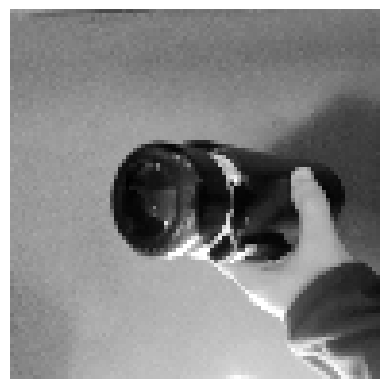

In [15]:
for vals in [dec_img,]:
    image = get_image(vals)
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')
    plt.show()

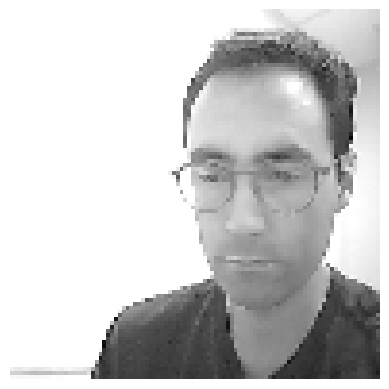

In [45]:

try:
    hex_string = input("Enter the image hex (max size 96x96):")
    hex_string_values = hex_string.split(",")[:96*96]
    hex_values = list(map(lambda hex_string: int(hex_string.strip(), 16), hex_string_values))
    image = get_image(hex_values)
    plt.imshow(image, cmap='gray', vmin=0, vmax=np.max(image))
    plt.axis('off')
    plt.show()
except Exception as e:
    image = None
    print(e)

In [28]:
if image is not None:
    user_images = len([img for img in os.listdir(images_path) if img.startswith("user")])
    output_file_path = os.path.join(images_path, f"user{user_images}")
    image_uint8 = image.astype(np.uint8)
    flattened_image_data = image_uint8.flatten()
    print(flattened_image_data.size)
    image_bytes = flattened_image_data.tobytes()

    with open(output_file_path, 'wb') as file:
        file.write(image_bytes)

9216
